In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import sys

In [21]:
RANDOM_STATE = 42

In [22]:
# dataset_dir = "/content/drive/MyDrive/ucsd/2022/spring/cse291/COVID19 Sera Data/"
dataset_dir = "/Users/rahul/Desktop/UCSD/Academics/Q3/291-B/"

In [23]:
dataset_df = pd.read_csv(dataset_dir + "covid19_sera_merged.csv")
dataset_df.head()

,maestro_column_unmod,maestro_column_variant,patient_id,label,y_covid,y_severe_type,is_train,Patient ID a,Metabolomics ID e,Metabolites,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,Healthy,0,0,1,HC1,jkdz1,jkdz1,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,Healthy,0,0,0,HC10,jkdz10,jkdz10,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,Healthy,0,0,0,HC12,jkdz12,jkdz12,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,Healthy,0,0,1,HC13,jkdz13,jkdz13,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,Healthy,0,0,1,HC17,jkdz17,jkdz17,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


## Split train/validation/test set

In [15]:
# from sklearn.model_selection import train_test_split

In [18]:
# train_df, test_df = train_test_split(dataset_df, test_size=0.2, random_state=RANDOM_STATE)

In [24]:
train_df = dataset_df.loc[dataset_df["is_train"] == 1, :]
test_df = dataset_df.loc[dataset_df["is_train"] == 0, :]

In [25]:
print(train_df.shape)
# print(val_df.shape)
print(test_df.shape)

(66, 203873)
(17, 203873)


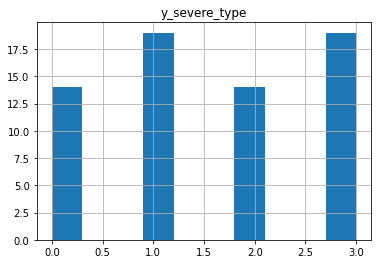

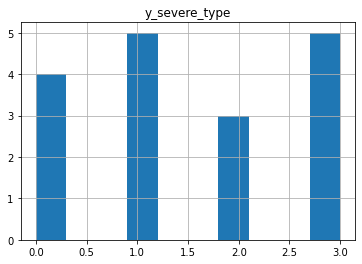

In [47]:
train_df[["y_severe_type"]].hist()
# val_df[["y_severe_type"]].hist()
test_df[["y_severe_type"]].hist()
plt.show()

del train_df
del test_df

# Imputation

In [51]:
features_df = dataset_df.iloc[:, 10:]

In [74]:
features_df.head(5)

,(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(2 or 3)-decenoate (10:1n7 or n8),"(2,4 or 2,5)-dimethylphenol sulfate",(R)-3-hydroxybutyrylcarnitine,(S)-3-hydroxybutyrylcarnitine,(S)-a-amino-omega-caprolactam,1-(1-enyl-oleoyl)-GPE (P-18:1)*,1-(1-enyl-palmitoyl)-2-arachidonoyl-GPC (P-16:0/20:4)*,1-(1-enyl-palmitoyl)-2-arachidonoyl-GPE (P-16:0/20:4)*,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,7439425.0,1.007010e+06,832046.2500,79229.4219,NaN,NaN,NaN,1.986185e+06,44282120.0,21753136.0,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,16636076.0,1.793032e+06,447215.5625,326591.0938,NaN,NaN,757049.2500,1.187651e+06,28710652.0,12963986.0,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,9140857.0,1.179147e+06,443550.2188,198629.5156,NaN,NaN,915471.5000,7.815120e+05,20551872.0,7749758.5,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,7863659.5,1.027411e+06,838084.8125,49912.3047,NaN,NaN,305460.7813,4.798703e+05,17261926.0,6189067.0,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,7996507.5,8.234444e+05,279286.1875,134257.1563,208471.2188,334848.4063,676507.4375,1.719241e+06,24612552.0,12316496.0,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


In [52]:
f"Features containing at least one null value: {len(features_df.columns[features_df.isna().any()].tolist())}"

'Features containing at least one null value: 1268'

In [53]:
missingness = features_df.isnull().mean().round(4).mul(100).sort_values(ascending=False)

In [54]:
for missing_percent in range(0, 110, 10):
    print(f"Number of columns with more (or equal to) than {missing_percent}% missingness: {len(missingness[missingness >= missing_percent])}")
    

Number of columns with more (or equal to) than 0% missingness: 203863
Number of columns with more (or equal to) than 10% missingness: 1054
Number of columns with more (or equal to) than 20% missingness: 983
Number of columns with more (or equal to) than 30% missingness: 939
Number of columns with more (or equal to) than 40% missingness: 886
Number of columns with more (or equal to) than 50% missingness: 852
Number of columns with more (or equal to) than 60% missingness: 825
Number of columns with more (or equal to) than 70% missingness: 791
Number of columns with more (or equal to) than 80% missingness: 775
Number of columns with more (or equal to) than 90% missingness: 759
Number of columns with more (or equal to) than 100% missingness: 734


In [88]:
# Mean imputation
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(features_df)
mean_imputed_df = imp_mean.transform(features_df)

In [62]:
np.save(dataset_dir + "covid19_sera_merged-MEAN.npy", mean_imputed_df)

In [89]:
# Median imputation

imp_median = SimpleImputer(strategy='median')
imp_median.fit(features_df)
median_imputed_df = imp_median.transform(features_df)

In [63]:
np.save(dataset_dir + "covid19_sera_merged-MEDIAN.npy", median_imputed_df)

In [90]:
# Mode imputation

imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode.fit(features_df)
mode_imputed_df = imp_mode.transform(features_df)

In [66]:
np.save(dataset_dir + "covid19_sera_merged-MODE.npy", mode_imputed_df)

In [91]:
# KNN imputation
from sklearn.impute import KNNImputer
sys.setrecursionlimit(100000)

# start the KNN training
t1 = datetime.now()
imputer = KNNImputer(n_neighbors = 3, weights='distance')
imputer.fit(features_df)
knn_imputed_df = imputer.transform(features_df)

print(f"Time taken: {datetime.now() - t1}")

Time taken: 0:00:24.448637


In [76]:
np.save(dataset_dir + "covid19_sera_merged-KNN-3.npy", knn_imputed_df)

In [ ]:
# To-do: MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

t2 = datetime.now()
lr = LinearRegression()
imp = IterativeImputer(estimator=lr, max_iter=2, verbose=2, imputation_order='roman', random_state=RANDOM_STATE)
mice_imputed_df = imp.fit_transform(features_df)
print(f"Time taken: {datetime.now() - t2}")

In [ ]:
np.save(dataset_dir + "covid19_sera_merged-MICE.npy", mice_imputed_df)

## Random forest and Gradient Boosting experiments

In [101]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score

In [118]:
def get_variant_features(df):
    return df[:, 102402:]

def get_unmod_features(df):
    return df[:, 941:102402]

def get_meta_features(df):
    return df[:, :941]

def get_all_features(df):
    return df.copy()

def get_y(df):
    return df.iloc[:, :7].copy()

def get_y_covid(df):
    return df.loc[:, "y_covid"]

In [103]:
# get idx of train and test splits
train_idx = dataset_df.index[dataset_df["is_train"] == 1]
test_idx = dataset_df.index[dataset_df["is_train"] == 0]

In [119]:
variant_train_mean = get_variant_features(mean_imputed_df[train_idx])
variant_test_mean = get_variant_features(mean_imputed_df[test_idx])

variant_train_median = get_variant_features(median_imputed_df[train_idx])
variant_test_median = get_variant_features(median_imputed_df[test_idx])

variant_train_mode = get_variant_features(mode_imputed_df[train_idx])
variant_test_mode = get_variant_features(mode_imputed_df[test_idx])

variant_train_knn = get_variant_features(knn_imputed_df[train_idx])
variant_test_knn = get_variant_features(knn_imputed_df[test_idx])

In [142]:
#Compute kendall correlation (between feature and target)
def compute_kendall_correlation(np, col_index, target):
    val = pd.Series(np[:, col_index]).corr(target, method = 'kendall')
    return val

In [139]:
#Compute stats corresponding to each column in the dataframe
def generate_column_stats_df(dataset_df, labels):
    col_stats = dict()
    for col_index in range(dataset_df.shape[1]):
        col_values = list(dataset_df[:, col_index])
        col_stats[col_index] = {'kendall': abs(compute_kendall_correlation(dataset_df, col_index, labels))}
    colstatsdf = pd.DataFrame(col_stats).transpose()
    return colstatsdf

In [140]:
#Filter out columns based on certain metrics
def select_feature_columns_ind_metrics(feature_type = 'variant',
                                       column_stats = None,
                                       missing_ratio_threshold = None,
                                       kendall_corr_threshold = None):
    if column_stats is None:
        return None
    
    if kendall_corr_threshold:
        column_stats = column_stats[column_stats['kendall'] > kendall_corr_threshold]
    
    selected_indices = list(column_stats.index)
    
    return selected_indices

In [143]:
columnstats_mean = generate_column_stats_df(variant_train_mean, train_labels)
columnstats_median = generate_column_stats_df(variant_train_median, train_labels)
columnstats_mode = generate_column_stats_df(variant_train_mode, train_labels)
columnstats_knn = generate_column_stats_df(variant_train_knn, train_labels)

In [144]:
selected_col_indices_mean = select_feature_columns_ind_metrics(feature_type = 'variant',
                                                          column_stats = columnstats_mean,
                                                          kendall_corr_threshold = 0.1)

selected_col_indices_median = select_feature_columns_ind_metrics(feature_type = 'variant',
                                                          column_stats = columnstats_median,
                                                          kendall_corr_threshold = 0.1)

selected_col_indices_mode = select_feature_columns_ind_metrics(feature_type = 'variant',
                                                          column_stats = columnstats_mode,
                                                          kendall_corr_threshold = 0.1)

selected_col_indices_knn = select_feature_columns_ind_metrics(feature_type = 'variant',
                                                          column_stats = columnstats_knn,
                                                          kendall_corr_threshold = 0.1)

In [147]:
n_experiments = 10
n_estimators = 50

train_labels = dataset_df.loc[train_idx, "y_covid"]
test_labels = dataset_df.loc[test_idx, "y_covid"]

In [ ]:
mean_models = []

mean_accs = []
mean_pres = []

impute_train = variant_train_mean.iloc[:, selected_col_indices_mean]
impute_test = variant_test_mean.iloc[:, selected_col_indices_mean]
for i in range(n_experiments):
    print("[MEAN] Running experiment", i + 1)
    lg_model = LGBMClassifier(n_estimators = n_estimators, random_state = RANDOM_STATE)
    
    model.fit(impute_train, train_labels)

    train_preds = model.predict(variant_train_mean)
    test_preds = model.predict(variant_test_mean)

    mean_models.append(lg_model)
    
    mean_accs.append((accuracy_score(train_labels, train_preds),
                 accuracy_score(test_labels, test_preds)))
    
    mean_pres.append((precision_score(train_labels, train_preds),
                 precision_score(test_labels, test_preds)))

In [ ]:
median_models = []

median_accs = []
median_pres = []


impute_train = variant_train_median.iloc[:, selected_col_indices_mean]
impute_test = variant_test_median.iloc[:, selected_col_indices_mean]
for i in range(n_experiments):
    print("[MEDIAN] Running experiment", i + 1)
    lg_model = LGBMClassifier(n_estimators = n_estimators, random_state = RANDOM_STATE)
    
    model.fit(impute_train, train_labels)

    train_preds = model.predict(impute_train)
    test_preds = model.predict(impute_test)

    median_models.append(lg_model)
    
    median_accs.append((accuracy_score(train_labels, train_preds),
                 accuracy_score(test_labels, test_preds)))
    
    median_pres.append((precision_score(train_labels, train_preds),
                 precision_score(test_labels, test_preds)))

In [ ]:
mode_models = []

mode_accs = []
mode_pres = []

impute_train = variant_train_mode.iloc[:, selected_col_indices_mean]
impute_test = variant_test_mode.iloc[:, selected_col_indices_mean]
for i in range(n_experiments):
    print("[MODE] Running experiment", i + 1)
    lg_model = LGBMClassifier(n_estimators = n_estimators, random_state = RANDOM_STATE)
    
    model.fit(impute_train, train_labels)

    train_preds = model.predict(impute_train)
    test_preds = model.predict(impute_test)

    mode_models.append(lg_model)
    
    mode_accs.append((accuracy_score(train_labels, train_preds),
                 accuracy_score(test_labels, test_preds)))
    
    mode_pres.append((precision_score(train_labels, train_preds),
                #  precision_score(val_df["y_covid"], val_preds),
                 precision_score(test_labels, test_preds)))

In [ ]:
knn_models = []

knn_accs = []
knn_pres = []

impute_train = variant_train_knn.iloc[:, selected_col_indices_mean]
impute_test = variant_test_knn.iloc[:, selected_col_indices_mean]
for i in range(n_experiments):
    print("[kNN] Running experiment", i + 1)
    lg_model = LGBMClassifier(n_estimators = n_estimators, random_state = RANDOM_STATE)
    
    model.fit(impute_train, train_labels)

    train_preds = model.predict(impute_train)
    test_preds = model.predict(impute_test)

    knn_models.append(lg_model)
    
    knn_accs.append((accuracy_score(train_labels, train_preds),
                 accuracy_score(test_labels, test_preds)))
    
    knn_pres.append((precision_score(train_labels, train_preds),
                #  precision_score(val_df["y_covid"], val_preds),
                 precision_score(test_labels, test_preds)))

In [ ]:
sum(models[0][2].feature_importances_ != 0)

26

In [ ]:
idxs = []
for i in range(n_experiments):
    for j,x in enumerate(models[i][2].feature_importances_):
        if x != 0:
            idxs.append((j, x))
idxs = set(idxs)
print(len(idxs))
idxs = sorted(idxs, key=lambda x: x[1], reverse=True)
idxs

In [ ]:
idxs = np.array(idxs)
idxs

In [ ]:
important_df = dataset_df[["maestro_column_variant", "patient_id", "y_covid"] + list(variant_train.columns[idxs[:, 0]])]
important_df

In [ ]:
important_df.to_csv(dataset_dir + "important_variant_peptides.tsv", sep="\t", index=False)